In [70]:
# 전역 변수 설정
DATA_SIZE=1000
VOCAB_SIZE = 10000  # 단어 사전 크기
MAX_LEN = 200       # 패딩할 최대 문장 길이

In [71]:
import pandas as pd

df = pd.read_csv("/content/IMDB Dataset.csv") # https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df = df.sample(n=DATA_SIZE, random_state=42).reset_index() # 랜덤 1000개 추출
df = df.drop("index", axis=1)

print("=" * 60)
print("IMDB Data Set")
print("=" * 60)
print(f"총 데이터 개수: {len(df)}")
print(f"\n감정 분포:")
print(df['sentiment'].value_counts())
print(f"\n컬럼 정보:")
print(df.info())
print("\n샘플:")
print(df.head())


IMDB Data Set
총 데이터 개수: 1000

감정 분포:
sentiment
negative    524
positive    476
Name: count, dtype: int64

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

샘플:
                                              review sentiment
0  I really liked this Summerslam due to the look...  positive
1  Not many television shows appeal to quite as m...  positive
2  The film quickly gets to a major chase scene w...  negative
3  Jane Austen would definitely approve of this o...  positive
4  Expectations were somewhat high for me when I ...  negative


In [72]:
# HTML 태그 제거
import re
import html # HTML 엔티티 처리를 위해 import

def remove_html_tags_regex(text):
    # 1. HTML 태그 제거: <로 시작해서 >로 끝나는 모든 것을 찾음
    # <.*?> : . (모든 문자)가 * (0번 이상) 반복되는데, ? (non-greedy)
    # ?가 없으면 "<b>text</b>" 전체를 태그로 인식할 수 있음
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern, ' ', text) # 태그를 공백(' ')으로 치환

    # 2. HTML 엔티티 변환 (e.g., &nbsp; -> 공백, &lt; -> <)
    cleaned_text = html.unescape(cleaned_text)

    # 3. 여러 개의 공백을 하나로 합침
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

df['review'] = df['review'].apply(remove_html_tags_regex)
print("HTML 태그 제거 완료")
print("\nHTML 제거 샘플:")
print(df['review'][0])

HTML 태그 제거 완료

HTML 제거 샘플:
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers

In [73]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# 영어 불용어 리스트 로드
stop_words = set(stopwords.words('english'))

# 텍스트 정제 및 불용어 제거를 한 번에 처리하는 함수
def clean_and_remove_stopwords(text):

    # 소문자 변환 및 정제 (알파벳, 공백, '만 남김)
    text = text.lower()
    text = re.sub(r'[^a-z\s\']', '', text)

    # 토큰화 (띄어쓰기 기준)
    tokens = text.split()

    # 불용어 제거
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 다시 하나의 문자열로 합치기
    return ' '.join(filtered_tokens)

print("전처리 시작...")
df['review_cleaned'] = df['review'].apply(clean_and_remove_stopwords)

print("전처리 완료.")
print("\n--- 전처리 후 샘플 ---")
print(df['review'][0])

전처리 시작...
전처리 완료.

--- 전처리 후 샘플 ---
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Head

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
# 전처리 후 단어 개수 계산
df['word_count_after'] = df['review_cleaned'].apply(lambda x: len(x.split()))

print("=" * 60)
print("전처리 후 단어 개수 통계")
print("=" * 60)
print(df['word_count_after'].describe())
print(f"\n중앙값(Median): {df['word_count_after'].median():.0f}")
print(f"최빈값(Mode): {df['word_count_after'].mode()[0]:.0f}")

# 백분위수 확인
print("\n백분위수 분포:")
for p in percentiles:
    value = np.percentile(df['word_count_after'], p)
    print(f"{p}%: {value:.0f} 단어")

전처리 후 단어 개수 통계
count    1000.000000
mean      118.059000
std        91.109772
min        14.000000
25%        62.000000
50%        88.000000
75%       142.000000
max       568.000000
Name: word_count_after, dtype: float64

중앙값(Median): 88
최빈값(Mode): 69

백분위수 분포:
10%: 43 단어
20%: 58 단어
50%: 88 단어
70%: 126 단어
90%: 235 단어
95%: 317 단어
99%: 468 단어


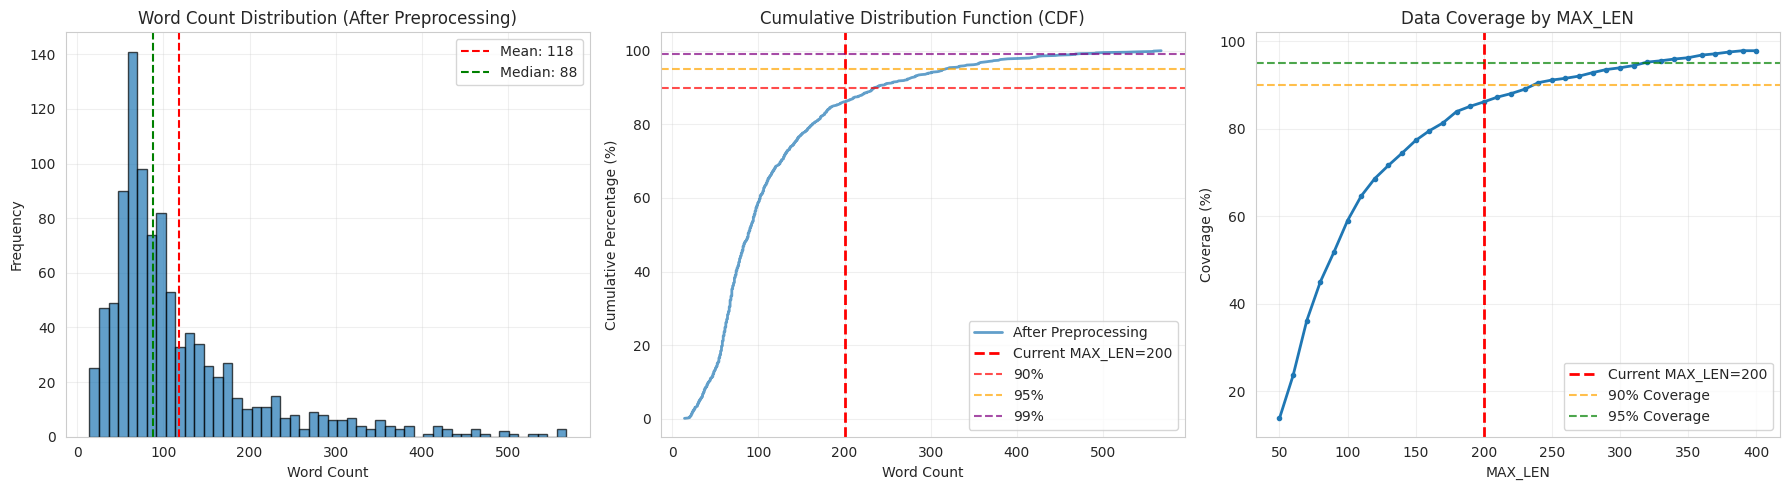

In [86]:
import matplotlib.pyplot as plt

# 전처리 후 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 히스토그램
axes[0].hist(df['word_count_after'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['word_count_after'].mean(), color='r', linestyle='--',
                label=f'Mean: {df["word_count_after"].mean():.0f}')
axes[0].axvline(df['word_count_after'].median(), color='g', linestyle='--',
                label=f'Median: {df["word_count_after"].median():.0f}')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Word Count Distribution (After Preprocessing)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. 누적 분포 (CDF)
sorted_after = np.sort(df['word_count_after'])
cumulative = np.arange(1, len(sorted_after) + 1) / len(sorted_after) * 100

axes[1].plot(sorted_after, cumulative, linewidth=2, label='After Preprocessing', alpha=0.7)
axes[1].axvline(MAX_LEN, color='r', linestyle='--', linewidth=2, label=f'Current MAX_LEN={MAX_LEN}')
axes[1].axhline(90, color='r', linestyle='--', alpha=0.7, label='90%')
axes[1].axhline(95, color='orange', linestyle='--', alpha=0.7, label='95%')
axes[1].axhline(99, color='purple', linestyle='--', alpha=0.7, label='99%')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].set_title('Cumulative Distribution Function (CDF)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. 커버리지 분석
truncation_rates = []
max_len_candidates = range(50, 401, 10)
for max_len in max_len_candidates:
    coverage = (df['word_count_after'] <= max_len).sum() / len(df) * 100
    truncation_rates.append(coverage)

axes[2].plot(max_len_candidates, truncation_rates, linewidth=2, marker='o', markersize=3)
axes[2].axvline(MAX_LEN, color='r', linestyle='--', linewidth=2, label=f'Current MAX_LEN={MAX_LEN}')
axes[2].axhline(90, color='orange', linestyle='--', alpha=0.7, label='90% Coverage')
axes[2].axhline(95, color='green', linestyle='--', alpha=0.7, label='95% Coverage')
axes[2].set_xlabel('MAX_LEN')
axes[2].set_ylabel('Coverage (%)')
axes[2].set_title('Data Coverage by MAX_LEN')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## MAX_LEN 설정을 위한 EDA
1. MAX_LEN을 너무 짧게 설정하면 중요한 정보가 손실됨
2. MAX_LEN을 너무 길게 설정하면 불필요한 Padding이 많이 들어감

## EDA 결과 분석
```
============================================================
전처리 후 단어 개수 통계
============================================================
count    1000.000000
mean      118.059000
std        91.109772
min        14.000000
25%        62.000000
50%        88.000000
75%       142.000000
max       568.000000
```
- 평균(118) > 중앙값(88) : 중앙값보다 단어 수가 많은 리뷰가 더 많음
- 표준편차(91) : 단어 개수의 편차가 큼
- 최대값(568)과 중앙값(88)의 큰 차이 : 이상치 존재

```
백분위수 분포:
10%: 43 단어
20%: 58 단어
50%: 88 단어
70%: 126 단어
90%: 235 단어
95%: 317 단어
99%: 468 단어
```
- 90% <-> 95% : 82단어 증가
- 95% <-> 99% : 151단어 증가
- 최대한 정보 손실을 막으면서 효율적인 학습을 위한 커버리지를 235 단어로 결정함